<a href="https://colab.research.google.com/github/bhanupra7ap/Stock_Ptice_prediction/blob/main/stock_price_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [ ]:
# Fetch stock data for Apple (AAPL) from Yahoo Finance
target = 'GOOGL'
data = yf.download(target, start='2020-01-01', end='2023-01-01')

# Selecting the Close price for prediction
close_prices = data['Close'].values

# Reshape to 2D array for MinMaxScaler
close_prices = close_prices.reshape(-1, 1)

# Normalizing the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Define the number of previous days to consider (sequence length)
n_steps = 60

# Creating the sequences
X = []
y = []

for i in range(n_steps, len(scaled_data)):
    X.append(scaled_data[i-n_steps:i, 0])  # past 60 days as input
    y.append(scaled_data[i, 0])  # the next day as the target

# Convert to numpy arrays
X, y = np.array(X), np.array(y)

# Reshape X to be compatible with LSTM input (samples, timesteps, features)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [ ]:
# Split the data (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
# Build the LSTM model
model = Sequential()

# Adding LSTM layers with Dropout for regularization
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Output layer (single value prediction)
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 0.1823
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0200
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - loss: 0.0065
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0064
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0062
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0070
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0051
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0050
Epoch 9/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0045
Epoch 10/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0052


In [ ]:
# Predicting the test set results
predicted_stock_price = model.predict(X_test)

# Inverse the scaling to get the actual prices
predicted_stock_price = scaler.inverse_transform(predicted_stock_price.reshape(-1, 1))
real_stock_price = scaler.inverse_transform(y_test.reshape(-1, 1))

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step


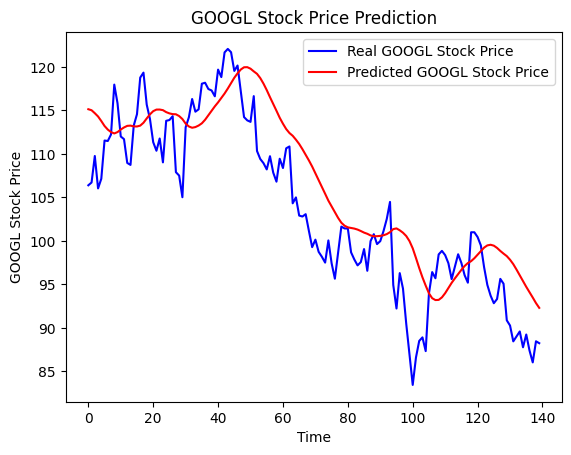

In [ ]:
import matplotlib.pyplot as plt

# Plot the results
plt.plot(real_stock_price, color='blue', label=f'Real {target} Stock Price')
plt.plot(predicted_stock_price, color='red', label=f'Predicted {target} Stock Price')
plt.title(f'{target} Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(f'{target} Stock Price')
plt.legend()
plt.show()

In [ ]:
# Get the last n_steps of the scaled data to start future predictions
last_sequence = scaled_data[-n_steps:]

# Reshape the last sequence to be compatible with LSTM input (samples, timesteps, features)
last_sequence = np.reshape(last_sequence, (1, n_steps, 1))

# List to store future predictions (next 30 days)
future_predictions = []

# Predict stock prices for the next 30 days
for day in range(30):
    # Predict the next day's price
    predicted_price = model.predict(last_sequence)

    # Store the predicted price
    future_predictions.append(predicted_price[0, 0])

    # Reshape predicted_price to match the sequence format (samples, timesteps, features)
    predicted_price = np.reshape(predicted_price, (1, 1, 1))

    # Update the sequence by removing the oldest value and adding the predicted price
    last_sequence = np.append(last_sequence[:, 1:, :], predicted_price, axis=1)

# Inverse transform to get the actual predicted prices (unscaling the data)
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Display the predicted prices for the next 30 days
print("Predicted stock prices for the next 30 days:", future_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━

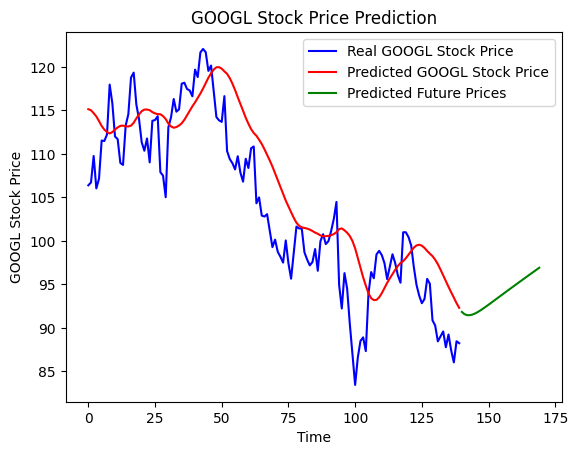

In [ ]:
# Create a range for the predicted future prices (extending beyond the test data)
future_days = np.arange(len(real_stock_price), len(real_stock_price) + 30)

# Plot the real stock price and the predicted stock price (for the test set)
plt.plot(real_stock_price, color='blue', label=f'Real {target} Stock Price')
plt.plot(predicted_stock_price, color='red', label=f'Predicted {target} Stock Price')

# Plot the predicted future stock prices
plt.plot(future_days, future_predictions, color='green', label='Predicted Future Prices')

# Add titles and labels
plt.title(f'{target} Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(f'{target} Stock Price')
plt.legend()

# Show the plot
plt.show()
